# World Happiness Report

# Porblem Statement

Context

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset. 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn import datasets, metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
df.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


From the data above, we analyse that Happiness Score varies from 2.839 to 7.587 and Standard Error doesnot contribute much as it varies between 0.01848 to 0.136930

Columns which describes the extent to which these factors contribute in evaluating the happiness in each country is below:

    GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption

Also Dystopia Residual is the unexplained value for each country.

So we can succesfully remove Region,Standard Error and Dystopia Residual.

In [6]:
dystopia=df['Dystopia Residual']
dystopia

0      2.51738
1      2.70201
2      2.49204
3      2.46531
4      2.45176
        ...   
153    0.67042
154    1.63328
155    0.32858
156    1.83302
157    1.56726
Name: Dystopia Residual, Length: 158, dtype: float64

In [7]:
standardError=df['Standard Error']
standardError

0      0.03411
1      0.04884
2      0.03328
3      0.03880
4      0.03553
        ...   
153    0.03464
154    0.03656
155    0.05015
156    0.08658
157    0.06727
Name: Standard Error, Length: 158, dtype: float64

In [8]:
df.drop(['Region','Standard Error', 'Dystopia Residual'],axis=1,inplace=True)

In [9]:
df.head(5)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


So we have successfully removed the columns as shown above

In [10]:
#Lets check if we have empty values or not
df.isnull().sum()

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
dtype: int64

We have no empty values in our dataset

# Visualize all the features

# HeatMap

<AxesSubplot:>

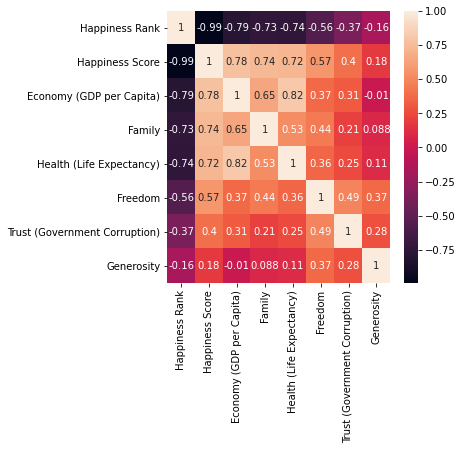

In [11]:
plt.figure(figsize = (5,5))
sns.heatmap(df.corr(), annot = True)

It looks like Economy (GDP per Capita), Health, and Family are strongly correlated with the Happiness score. Freedom correlates quite well with the Happiness score; however, Freedom connects quite well with almost all the data. 

Corruption still has a mediocre correlation with the Happiness score.

In [12]:
columns_toPlot = ['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity']
dataToPlot=df[columns_toPlot]
dataToPlot.head(2)

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630


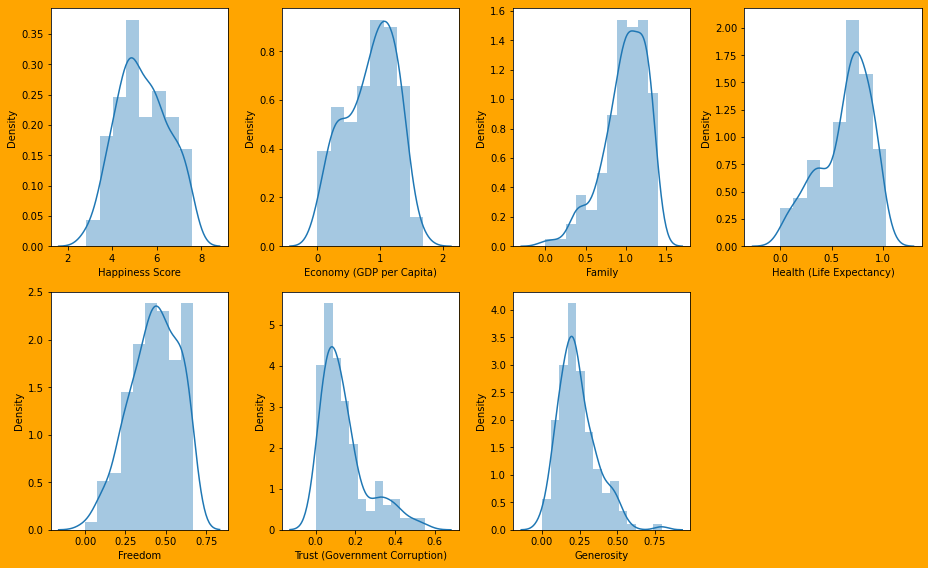

In [13]:
#Lets see data distribution
plt.figure(figsize=(13,8),facecolor='orange')
plotnumber=1

for column in dataToPlot:
    #print(column)
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(dataToPlot[column])
        plt.xlabel(column,fontsize=10)
        
    plotnumber+=1   
    
plt.tight_layout()

Now, since Happiness Rank and Country has nothing to do with the Happiness Score calculation as the other six parameters are used to calculated the Happiness score, we will drop them for plotting strip plot.

Our Target Column i.e y is our Happiness Score. 

So lets drop and start visualizinf better further.

In [14]:
X=df.drop(columns=['Happiness Score','Country','Happiness Rank'])
y=df['Happiness Score']


In [16]:
X.head(1)

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678


In [18]:
y[0]

7.587

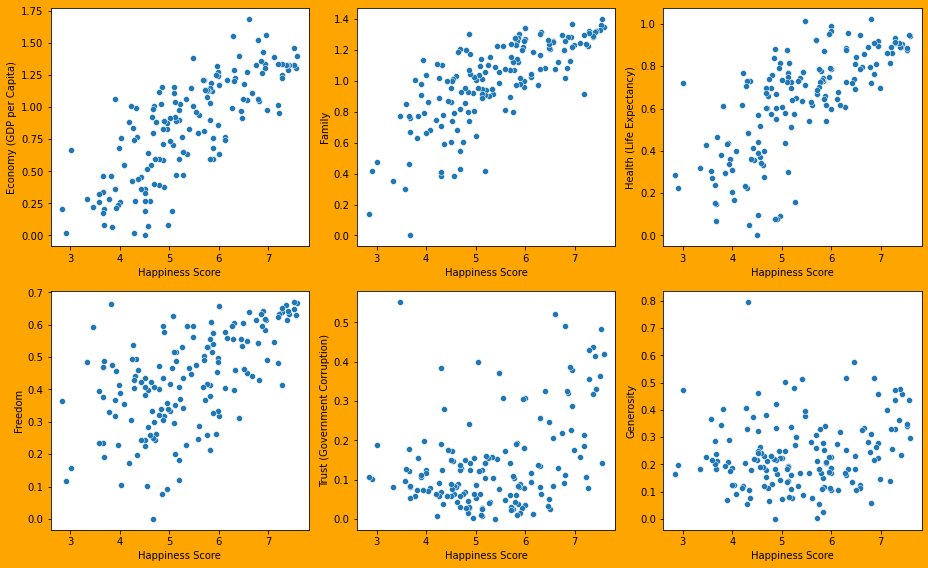

In [19]:
plt.figure(figsize=(13,8),facecolor='orange')
plotnumber=1

for column in X:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)        
        sns.scatterplot(y,X[column])
        plt.ylabel(column,fontsize=10)
        plt.xlabel('Happiness Score',fontsize=10)
        
    plotnumber+=1   
    
plt.tight_layout()

# Outliers

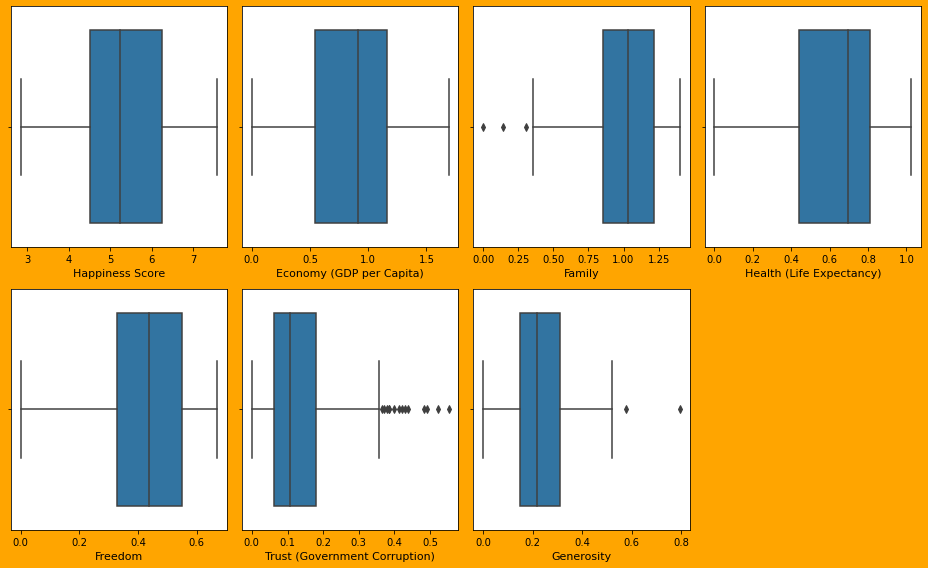

In [20]:
#Lets see data distribution again
plt.figure(figsize=(13,8),facecolor='orange')
graph=1

for column in dataToPlot:
    
    if graph<=8:
        ax=plt.subplot(2,4,graph)        
        sns.boxplot(dataToPlot[column])
        plt.xlabel(column,fontsize=11)
        
    graph+=1   
    
plt.tight_layout()

# Analysis of our Visualization

It looks like Economy (GDP per Capita), Health, and Family are strongly correlated with the Happiness score. 

GDP Per Capita vaires from 0 to 1.690420, in the plots above it is clear that Happiness Score increases when GDP Per capita of the country Increases.

Family : Family or the support from society, friends enhances the quality of life and provides a buffer against adverse life events.Here it varies between 0 to 1.402230, in the plots above it is clear that if it increases the Happiness Score increases

Health (Life Expectancy) :Healthy Life Expectancy is the average number of years that a newborn can expect to live in "full health" which in laymen term we can say that it should not be hampered by disabling illnesses or injuries. Here it varies between 0 to 1.025250.In the plots above it is clear that if it increases the Happiness Score increases

Freedom : Freedom varies from 0 to 0.669730.In the plots above it is clear that if it increases the Happiness Score increases. We see that Freedom connects quite well with almost all the data.

Trust(Government Corruption) : Thsi value ranges from 0 to 0.551910.Corruption in the government or trust of the people in their Government is still a mediocre correlation with the Happiness score. It has good impact on Happiness Score but if it increases the values can rarely increase.

Generosity : Generosity is the national average of response to the questions.It varies between 0 to 0.795880.It also contributes good in calculating the Happiness score.

# Linear Regression

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable we want to predict is called the dependent variable. The variable we are using to predict the other variable's value is called the independent variable.

In short, Linear regression will refer to one independent variable to make a prediction. Multiple Linear regression will refer to multiple independent variables to make a prediction.

Simple Linear Regression has one predictor(independent) variable x and target dependent variable (y). y=b0+b1X b0 is the intercept b1 is the slope When we fit and train the model these parameters are catched.

Let us implement it below

In [21]:
train_data, test_data = train_test_split(df, train_size = 0.8, random_state = 7)
lr = LinearRegression()

Lets use GDP Per capita Income first to predict Happiness Score

In [22]:
X_train = np.array(train_data['Economy (GDP per Capita)'],
                   dtype = pd.Series).reshape(-1,1)
y_train = np.array(train_data['Happiness Score'], dtype = pd.Series)
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
X_test = np.array(test_data['Economy (GDP per Capita)'], 
                    dtype = pd.Series).reshape(-1,1)
y_test = np.array(test_data['Happiness Score'], dtype = pd.Series)

pred = lr.predict(X_test)

In [24]:
#Root Mean Squared Error
#It shows how far predictions fall from measured true values using Euclidean distance
rootMeanSqError = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.4f'))
rootMeanSqError

0.7152

In [25]:
#R-Squared (Training)
#R-squared is a statistical measure that represents the goodness of fit of a regression model. 
#The ideal value for r-square is 1. 
#The closer the value of r-square to 1, the better is the model fitted
rSquareTrain = float(format(lr.score(X_train, y_train),'.4f'))
rSquareTrain

0.6227

In [26]:
#R-Squared (Test)
rSquareTest = float(format(lr.score(X_test, y_test),'.4f'))
rSquareTest

0.531

In [27]:
print ("Average Score for Test Data: {:.4f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))
print('Happiness score = ',np.round(lr.intercept_,4),
      '+',np.round(lr.coef_,4),'* Economy (GDP per Capita)')

Average Score for Test Data: 5.1891
Intercept: 3.465359696813355
Coefficient: [2.25417888]
Happiness score =  3.4654 + [2.2542] * Economy (GDP per Capita)


Now that Since we have just two dimensions at the simple regression, it is easy to draw it. The below chart determines the result of the simple regression.

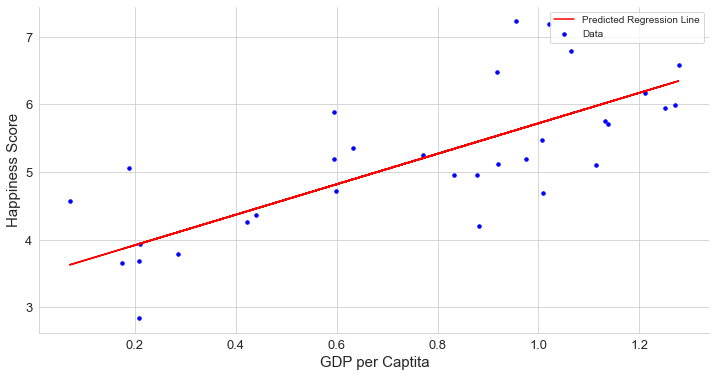

In [28]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test,color='blue',label="Data", s = 12)
plt.plot(X_test,lr.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("GDP per Captita", fontsize=15)
plt.ylabel("Happiness Score", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

The relationship between GDP per capita(Economy of the country) has a strong positive correlation with Happiness Score, that is, if the GDP per capita of a country is higher than the Happiness Score of that country, it is also more likely to be high.

# Lets Implement Linear Regression with Health (Life Expectancy) also

In [29]:
X_train = np.array(train_data['Health (Life Expectancy)'],
                   dtype = pd.Series).reshape(-1,1)
y_train = np.array(train_data['Happiness Score'], dtype = pd.Series)
lr.fit(X_train, y_train)

LinearRegression()

In [30]:
X_test = np.array(test_data['Health (Life Expectancy)'], 
                    dtype = pd.Series).reshape(-1,1)
y_test = np.array(test_data['Happiness Score'], dtype = pd.Series)

pred = lr.predict(X_test)

In [31]:
#Root Mean Squared Error
#It shows how far predictions fall from measured true values using Euclidean distance
rootMeanSqError = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.4f'))
rootMeanSqError

0.7259

In [32]:
#R-Squared (Training)
rSquareTrain = float(format(lr.score(X_train, y_train),'.4f'))
rSquareTrain

0.5199

In [33]:
#R-Squared (Test)
rSquareTest = float(format(lr.score(X_test, y_test),'.4f'))
rSquareTest

0.5169

In [34]:
print ("Average Score for Test Data: {:.4f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))
print('Happiness score = ',np.round(lr.intercept_,4),
      '+',np.round(lr.coef_,4),'* Health (Life Expectancy)')


Average Score for Test Data: 5.1891
Intercept: 3.354007197070931
Coefficient: [3.27901732]
Happiness score =  3.354 + [3.279] * Health (Life Expectancy)


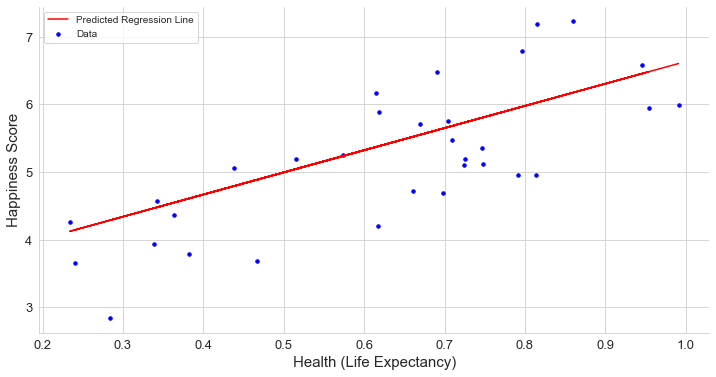

In [35]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test,color='blue',label="Data", s = 12)
plt.plot(X_test,lr.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("Health (Life Expectancy)", fontsize=15)
plt.ylabel("Happiness Score", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

The relationship between Health (Life Expectancy) has a strong positive correlation with Happiness Score, that is, if the Healthy of the perople of the country is better or by birth they dont have any disorder than the Happiness Score of that country, it is also more likely to be high.

# Multiple Regression

In [36]:
df.head(2)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630


In [38]:
train_data_mr,test_data_mr = train_test_split(df,train_size = 0.8,random_state=3)

independent_variable = ['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity']
multiple_regression_model = LinearRegression()

multiple_regression_model.fit(train_data_mr[independent_variable],train_data_mr['Happiness Score'])

print('Intercept: {}'.format(multiple_regression_model.intercept_))
print('Coefficients: {}'.format(multiple_regression_model.coef_))

print('Happiness score = ',np.round(multiple_regression_model.intercept_,4),
      '+',np.round(multiple_regression_model.coef_[0],4),'∗ Economy (GDP per Capita)',
      '+',np.round(multiple_regression_model.coef_[5],4),'* Family'
      '+',np.round(multiple_regression_model.coef_[1],4),'* Health (Life Expectancy)', 
      '+',"\n",
      '+',np.round(multiple_regression_model.coef_[2],4),'* Freedom',
      '+',np.round(multiple_regression_model.coef_[3],4),'* Trust (Government Corruption)',
       '+',np.round(multiple_regression_model.coef_[4],4),'* Generosity')
      
prediction = multiple_regression_model.predict(test_data_mr[independent_variable])

rootMeanSqError = float(format(np.sqrt(metrics.mean_squared_error(
                       test_data_mr['Happiness Score'],prediction)),'.4f'))

rSquareTrain = float(format(multiple_regression_model.score(
                        train_data_mr[independent_variable],
                        train_data_mr['Happiness Score']),'.4f'))

rSquareTest = float(format(multiple_regression_model.score(
                        test_data_mr[independent_variable],
                        test_data_mr['Happiness Score']),'.4f'))


Intercept: 1.8280680048770868
Coefficients: [0.94963075 1.4529232  0.79787549 1.35410705 0.65080418 0.3888729 ]
Happiness score =  1.8281 + 0.9496 ∗ Economy (GDP per Capita) + 0.3889 * Family+ 1.4529 * Health (Life Expectancy) + 
 + 0.7979 * Freedom + 1.3541 * Trust (Government Corruption) + 0.6508 * Generosity


Now lets implement the above formula in one of the Country (Switzerland) and Test. Please note that we need to add the Dystopia Residual value as well use the Standard Error to calculate the proper Happiness Score

In [39]:
df.head(2)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630


With our Multiple Regression model and the new formula used, we see there is slight change in the Ranking of World Happiness Index of the country

In [40]:
import pickle
filename="WorldHappinessScore.pkl"
pickle.dump(multiple_regression_model,open(filename,'wb'))